In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
#This x does nothing apparently
X = 1

MU = np.array([3, 6])

#Morning and Afternoon Wind Speed in Australia

morning_wind = [4, 19, 11, 20, 6, 7, 17, 4, 11, 17, 9, 17, 19, 6, 4, 9, 0, 13, 19]

afternoon_wind  = [22, 26, 9, 24, 17, 28, 6, 30, 9, 6, 9, 22, 20, 13, 19, 13, 26, 30,
30]

In [3]:
print("\nArray 1: ", morning_wind, "\n")
print("Array 2: ", afternoon_wind, "\n")

#Retrieve covariance and 1x1 Scalar

cov = np.cov(morning_wind, afternoon_wind)

print("Covariance Matrix of Row Vectors = ", cov) # show covariance

print("\nCovariance Matrix Dimension: ", cov.ndim) 

S = np.array([(X - MU.T)@np.linalg.inv(cov)@(X - MU)])


print("\n(x - m^T) * E^-1 * (x - m) = ", S, '\n')
print('Matrix (Scalar) Dimension of Result: ', S.ndim)


#2-D Contour plots

#------------
#Diagonalise the covariance matrix:

#Check if Matrix is Symmetric
print('------\n\nCheck if Covariance Matrix is symmetric, cov should be equal to its transpose: '
      , cov == cov.T, '\n')

#Get Eigenvectors and Values
V, P = np.linalg.eigh(cov)
print('Eigenvalues: \n', V, '\n')
print('Eigenvectors: \n', P, '\n')


# Convert Eigenvectors to Diagonal Matrix
D = np.diag(V)
print('Diagonal Matrix: \n', D)

print('P = \n', P, '\n')
print('D = \n', D, '\n')
print('P x D x P^-1 = \n', P@D@np.linalg.inv(P), '\n')

print('Does P x D x P^-1 = E?\n')
print('Evaluating E with PDP^-1: \n', np.isclose(cov, P@D@np.linalg.inv(P)))


Array 1:  [4, 19, 11, 20, 6, 7, 17, 4, 11, 17, 9, 17, 19, 6, 4, 9, 0, 13, 19] 

Array 2:  [22, 26, 9, 24, 17, 28, 6, 30, 9, 6, 9, 22, 20, 13, 19, 13, 26, 30, 30] 

Covariance Matrix of Row Vectors =  [[40.3625731  -3.20467836]
 [-3.20467836 72.21052632]]

Covariance Matrix Dimension:  2

(x - m^T) * E^-1 * (x - m) =  [0.46895454] 

Matrix (Scalar) Dimension of Result:  1
------

Check if Covariance Matrix is symmetric, cov should be equal to its transpose:  [[ True  True]
 [ True  True]] 

Eigenvalues: 
 [40.04330513 72.52979429] 

Eigenvectors: 
 [[-0.99507401 -0.09913483]
 [-0.09913483  0.99507401]] 

Diagonal Matrix: 
 [[40.04330513  0.        ]
 [ 0.         72.52979429]]
P = 
 [[-0.99507401 -0.09913483]
 [-0.09913483  0.99507401]] 

D = 
 [[40.04330513  0.        ]
 [ 0.         72.52979429]] 

P x D x P^-1 = 
 [[40.3625731  -3.20467836]
 [-3.20467836 72.21052632]] 

Does P x D x P^-1 = E?

Evaluating E with PDP^-1: 
 [[ True  True]
 [ True  True]]


In [4]:
x_variables = np.array([0, 3, 6]) #This controls the length of the x-axis (should be used for independent variables)
y_variables = np.array([1, 4, 5]) #This controls the length of the y-axis (should be used for dependent varibles)

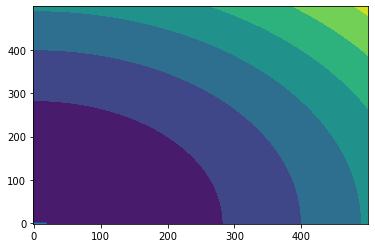

In [5]:
#values = 

x = np.arange(-1 ,500, 0.05)

y = np.arange(-1 ,500, 0.05)

fig1 = plt.figure()

ax = fig1.add_subplot(111)

ax.plot(stats.multivariate_normal.pdf(morning_wind, mean = 1, cov = 1))

#ax.plot(x, y)
x, y = np.meshgrid(x, y)
z = x**2 + y**2 

ax.contourf(x, y, z)

plt.show()

#ax.contour(x)